# General Information

## 1. The Dataset

This notebook contains our effort to reformat and clean [the experimental dataset of battery materials](https://doi.org/10.1038/s41597-020-00602-2) that is auto-generated using ChemDataExtractor.


Files:
- battery.csv: the original dataset by the cambridge group
---
- battery_clean.csv: the cleaned dataset
- battery#2_partially_corrected.csv: the file that contains manual corrections (Step 3 of the code section)
---
- battery_further_cleaned.csv: the cleaned dataset after applying the max coefficient cutoff (see 3.4 Coefficient-based data pruning and Step 3 of the code section)
---
- battery_ultra_cleaned.csv: the cleaned dataset after applying the max coefficient cutoff and the acronym / misrepresentation pruning (see 3.5 Dealing with acronyms and Step 3 of the code section)
- misrepresented.csv: the file that identifies instances with misrepresented formulas 
---
- periodic_table.csv: a periodic table containing elements and their properties. Could be used for feature encoding. 

The ultra cleaned version of the dataset has 254749 out of 292313 datapoints of the original dataset, each representing a battery cell. Each datapoint records exactly one property of the battery cell. There are 26 features/columns in the dataset:

|                       Feature                       |                                                Description                                                |
|:---------------------------------------------------:|:---------------------------------------------------------------------------------------------------------:|
| Formulas                                            | The formulas of battery components as a list of strings                                                   |
| Name_extracted                                      | The components extracted by ChemdataExtractor as a list of dictionaries                                   |
| Name_source                                         | Text extracted from the original paper that contains information about battery composition                |
| heterojunction                                      | Whether or not the battery has a dash separator that may imply heterojuntion in its Name_source              |
| heterojunction_unresolved                           | If the Formulas has not been corrected with regard to heterojunction (see info about errors)                  |
| DOI                                                 | DOI number of the original paper                                                                          |
| Date                                                | Date of publication. Might be helpful for data cleaning                                                   |
| Warning                                             | Warnings about the datapoint: Serial, near-Limit and Related. See the paper for details |
| Type of the material                                | Anode or Cathode                                                                                          |
| Property                                            | Propery the datapoint describes: voltage, capacity, efficiency, conductivity and Energy                   |
| Specifier                                           | Further information about the property                                                                    |
| Capacity_is_discharge                               | Whether or not the recorded capacity is discharge capacity                                                |
| Capacity_is_charge                                  | Whether or not the recorded capacity is charge capacity                                                   |
| Capacity_is_reversible                              | Whether or not the recorded capacity is reversible capacity                                               |
| Capacity_is_specific                                | Whether or not the recorded capacity is specific capacity                                                 |
| Capacity_is_theoretical                             | Whether or not the recorded capacity is theoretical capacity                                              |
| Capacity/Gram^(-1.0)Hour^(1.0)MilliAmpere^(1.0) | Capacity                                                                                                  |
| Cycles                                              | Cycles                                                                                                    |
| Current/C_rate                                      | Current in C_rate, cleaned to get rid of textual data                                                     |
| Current_original//C_rate                            | Current in C_rate, contains textual data                                                                  |
| Current/mAg^(-1)                                    | Current in mAg^(-1), cleaned to get rid of textual data                                                   |
| Current_original/mAg^(-1)                           | Current in mAg^(-1), contains textual data                                                                |
| Voltage/Volt^(1.0)                                  | Voltage                                                                                                   |
| Coulombic Efficiency/Percent^(1.0)                  | Coulombic Efficiency                                                                                      |
| Conductivity/CentiMeter^(-1.0)__Siemens^(1.0)       | Conductivity                                                                                              |
| Energy/KiloGram^(-1.0)__WattHour^(1.0)              | Energy                                                                                                    |


**Please refer to the [original paper](https://doi.org/10.1038/s41597-020-00602-2) for further information.** 




## 2. Data Cleaning and Error Correction

The original dataset augmented energy related data by derving new datapoints from existing datapoints using the formula:


Energy ( Wh / g ) = Capacity ( mAh / g ) ∗ Voltage ( V )/1000


We removed the calculated datapoints as the calculation result might be problematic and inaccurate. 


Based on the correctness of the formula, we have removed/ corrected some problematic datapoints.

- Datapoints are dropped when:

  - There are non-numeric coefficients in the formulas (e.g. SiOx)

  - One of the components listed by the original paper is an ion (e.g. Ni(II) or Ni2+). This is because the parser is unable to parser ions and the generated formula is incorrect

  - One of the formulas is manually identified as invalid


- Datapoints are corrected when:
  - There are "typos" (mostly text recognition errors in old papers) in the formulas. Common mistakes include:
    - o/O -> 0 (where Oxygen as confused with zero)
    - capital I, lowercase l, and number 1 confusion
    
  - Some battery components are not included in the formulas due to the ChemDataExtractor not recognising '–' (dash) as a separator.

  - One of the formulas is manually identified as errorneous when compared to the source text




## 3. Using the Dataset

### 3.1 Selecting the datapoints

Select datapoints with desired battery properties by filtering the Property column and the Specifier column. 



| Property             | Count  |   
|----------------------|--------|
| Capacity             | 137532 |   
| Voltage              | 103346 |   
| Coulombic Efficiency | 10429  |   
| Energy               | 8525   |   
| Conductivity         | 6635   |   

Further information about Capacity is also one-hot encoded into the dataset as features that begin with Capacity_is_ .

| Capacity Specifier      | Count |
|-------------------------|-------|
| Capacity_is_discharge   | 36600 |
| Capacity_is_charge      | 8822  |
| Capacity_is_reversible  | 16703 |
| Capacity_is_specific    | 13474 |
| Capacity_is_theoretical | 6261  |

### 3.2 Data cleaning based on warnings
There are 3 basic types of warnings: Serial, Related, and near-Limit. They can be combined to form complex warnings. Please read the original paper for details. 

| Warning | Count |
|---------|-------|
|      N/A|113963 |
|       S | 94469 |
|       L | 31070 |
|      LS | 16332 |
|       R |  7519 |
|      RL | 3114  |



### 3.3 Data cleaning based on the correctness of formulas

Although we have tried our best to identify and correct the errors in the formulas, we probably couldn't find all of them. 
Formulas might have missing components due to the ChemDataExtractor's sub-optimal ability to deal with separators. Some datapoints might not be valid as the Name_source is not an actual chemical, but some random text strings that the ChemDataExtractor recognised as 'formulas'.  In this example 0.7 volts has been confused by the parser as a formula with less than one oxygen atomsand one vanadium atom):


| datapoint 2413 |                            |
|---------------:|----------------------------|
|       Formulas |                  ['O0.7V'] |
| Name_extracted | [{'O': '0.7', 'V': '1.0'}] |
|    Name_source |                      O.70V |



Sometimes, the ChemDataExtractor is unable to recognise certain acronyms/abbreviations. These acronyms were either ignored or wrongly regarded as regular formulas. 


As mentioned in section 2, battery components might be missing due to the ChemDataExtractor's inability to recognise dashes as a separator for heterojunctions. We were able to correct 3569 outof 5974 formulas that might contain heterojunctions, but the remaining 2405 datapoints still have missing components. We recommend that these be dropped.


| heterojunction | heterojunction_unresolved | Count  |
|---------------:|--------------------------:|-------:|
|              0 |                         0 | 260493 |
|              1 |                         0 |   3569 |
|              1 |                         1 |   2405 |


Finally, we recomed you validate formulas against Name_extracted if feasible.


### 3.4 Coefficient-based data pruning

An effective and automatic way to prune away ridiculous formulas, that is, formulas with abnormally high coefficients. For example:

$N1237.4153$

$NSC1000$

$CoIn2S4311$

If the max coefficient threshold is set to be 100, 986 datapoints will be further pruned. 

### 3.5 Dealing with acronyms


Acronyms of chemicals can sometimes get interpreted as literal chemical formulas. For example: 

- Carbon Nano Fibre -> CNF
- Hexacyanoferrate -> HCF
- CoFe2O4 -> CFO

These acronyms, along with other misrepresented formulas, should be corrected or pruned. 

We identified 10725 such instaces in the dataset pruned using the method in 3.4.  


### 3.6 Formula encoding


This is the most important step before machine learning. Given a list of chemical formulas (as strings), how would you encode it in a ML-compatible way? 


We have prepared a periodic table for atom-wise mapping, but in the end the choice is yours. 


# The Code

All changes are reflected in the code except for a few manual corrections recorded in a csv file. 

With the original dataset and the correction file one would be able to reproduce the result (assuming the ase python module has already been installed)

In [1]:
import pandas as pd
import ast
from multiprocessing import Pool
import numpy as np
from ase.formula import Formula  # used as formula validator for heterojunctions
from chemparse import parse_formula # for coefficient pruning

## Step 1 - Data Formatting 
To format the data so that it is ML friendly and ready for preprocessing. Including:
- the deletion of useless columns
- the expansion and/or merging of certain columns (e.g. from property type column + property value column to multiple property-value columns)
- reindexation so that related datapoints are adjacent
- generating the string representation of the formulas, raising formula warning flags in the process.
- merging equivalent specifiers (e.g. capitalised and uncapitalised words)

----
**read files, extract features**

----

In [2]:
df = pd.read_csv('battery.csv', low_memory = False)
df = df.sort_values(by = ['DOI', 'Name', 'Property', 'Value'])
df.reset_index(drop = True, inplace = True)


In [3]:
def to_number(s):
    try:
        f = float(s)
        return f
    except ValueError:
        return s

# transform

features_kept = [c for c in df if c not in [ 'Value', 'Unit', 'Raw_value', 'Raw_unit']]
def extract_features(dp):
    local_dict = dp[features_kept].to_dict()
    if dp['Property'] == 'Capacity':
        local_dict[dp['Property'] + '/'+ 'Gram^(-1.0)  Hour^(1.0)  MilliAmpere^(1.0)'.replace(' ', '_')] = dp['Value']
        if dp['Info'] != 'None':
            info = ast.literal_eval(dp['Info'])
            if 'cycle_value' in info.keys():
                local_dict['Cycles'] = info['cycle_value']
            if 'current_units' in info.keys():
                if info['current_units'] in {'C', 'c'}:
                    local_dict['Current/C'] = info['current_value']
                elif info['current_units'] in {'Ag−1','A/g', 'Ag-1'}:
                    eval_ = to_number(info['current_value'])
                    if type(eval_) == float:
                        local_dict['Current/mAg^(-1)'] =  eval_ * 1000
                    else:
                        local_dict['Current/mAg^(-1)'] =  eval_ + '*1000'
                else:
                    local_dict['Current/mAg^(-1)'] = info['current_value'] 
    else:
        local_dict[dp['Property'] + '/'+ dp['Unit'].replace(' ', '_')] = dp['Value']
    return local_dict

with Pool(12) as p:    
    result = p.map (extract_features, [row[1] for row in df.iterrows()])

battery = pd.DataFrame(result)


In [4]:
battery.drop(index = df[df['Tag'] == 'Calculated'].index, inplace = True)
battery.drop(columns = ['Correctness', 'Journal', 'Title','Tag', 'Info'], inplace = True)
battery['Extracted_name'] = battery['Extracted_name'].apply(ast.literal_eval)

----
**get formulas, raise warnings**

----

In [5]:
# deal with a single formula, raise irregular flag if coefficients aren't numbers
def get_formula(d):
    acc = []
    ireg_flag = 0
    coef_flag = 0
    for k, v in d.items():
        try:
            e = float(v) # cast to float, handel error
            e = int(e) if e.is_integer() else e # cast to int if applicable
            if e >= 100 or e%10 == 0:
                coef_flag = 1
            acc.append(k + (str(e) if e!= 1 else ''))
        except ValueError:
            ireg_flag = 1
            acc.append(k + v)
    return ''.join(acc), ireg_flag, coef_flag

# deal with multiple formula/extracted name, raise flag if irregular compositions
def get_name(l):

    result = list(map(get_formula, l))
    return [x[0] for x in result], int(any([x[1] for x in result])), int(any([x[2] for x in result]))

names = battery['Extracted_name'].apply(get_name)
battery['Formulas'] = names.apply(lambda x: x[0])
battery['Formulas_nonnumeric'] = names.apply(lambda x: x[1])
battery['Formulas_coefficient_warning'] = names.apply(lambda x: x[2])
                                       

In [6]:
battery['Formulas_coefficient_warning'].value_counts()

0    281574
1      4021
Name: Formulas_coefficient_warning, dtype: int64

In [7]:
battery['Formulas_nonnumeric'].value_counts()

0    271053
1     14542
Name: Formulas_nonnumeric, dtype: int64

----
**feature reordering, process specifier values**

----

In [8]:
order = ['Formulas', 'Formulas_nonnumeric', 'Formulas_coefficient_warning' 
         ,'Extracted_name', 'Name','DOI', 'Date'
         ,'Warning', 'Type', 'Property', 'Specifier'
         ,'Capacity/Gram^(-1.0)__Hour^(1.0)__MilliAmpere^(1.0)'
         ,'Cycles','Current/C','Current/mAg^(-1)', 'Voltage/Volt^(1.0)'
         ,'Coulombic Efficiency/Percent^(1.0)'
         ,'Conductivity/CentiMeter^(-1.0)__Siemens^(1.0)'
         ,'Energy/KiloGram^(-1.0)__WattHour^(1.0)']
assert(len(order) == len(battery.columns))
battery = battery[order]
battery['Type'] = battery['Type'].replace('None', np.nan)

battery['Specifier'] = battery['Specifier'].apply(str.lower)

In [9]:
merge_dict = {'discharge capacities' : 'discharge capacity',
              'capacities' : 'capacity',
              'reversible capacities' : 'reversible capacity',
              'specific capacities' : 'specific capacity',
              'charge capacities' : 'charge capacity',
              'discharge specific capacities' : 'discharge specific capacity',
              'charge and discharge capacities' : 'discharge and charge capacities',
              'voltages' : 'voltage',
              'reversible discharge capacities' : 'reversible discharge capacity',
              'theoretical capacities' : 'theoretical capacity',
              'discharge and charge capacity' : 'discharge and charge capacities',
              'reversible specific capacities' : 'reversible specific capacity',
              'charge and discharge capacity' : 'discharge and charge capacities',
              'conductivities' : 'conductivity',
              'reversible charge capacities' : 'reversible charge capacity',
              'charge specific capacities' : 'charge specific capacity',
              'charge and discharge specific capacities' : 'discharge and charge specific capacities',
              'energies' : 'energy',
              'discharge and charge specific capacity': 'discharge and charge specific capacities',
              'reversible discharge specific capacities' : 'reversible discharge specific capacity',
              'electrical conductivities' : 'electrical conductivity',
              'reversible charge specific capacities' : 'reversible charge specific capacity',
              'charge and discharge specific capacity' : 'discharge and charge specific capacities',
              'electronic conductivities' : 'electronic conductivity',
              'reversible charge and discharge capacity' : 'reversible discharge and charge capacities',
              'reversible theoretical capacities' : 'reversible theoretical capacity',
              'coulombic efficiencies' : 'coulombic effciency'
              
             }

battery['Specifier'] = battery['Specifier'].apply(lambda x : merge_dict[x] if x in merge_dict.keys() else x)
battery['Specifier'] = battery.Specifier.replace('none', np.nan)
battery.rename(columns = {'Current/C' : 'Current/C_rate'}, inplace = True)


## Step 2 -- Finer Feature Processing
including:
- one hot encoding of capacity-related Specifiers
- extract numeric current values and add as few features


----
**one hot encoding**

----

In [10]:
for spec in ['discharge', 'charge', 'reversible', 'specific', 'theoretical']:
    battery['Capacity_is_'+ spec] = battery['Specifier'].apply(lambda x : 0 if type(x) != str else (1 if spec in x.split() else 0))

----
**dealing with current**

----

In [11]:
cs  = battery[[c for c in battery.columns if c[:7] == 'Current']]

In [12]:
c_rate = cs['Current/C_rate'].apply(lambda x : to_number(x) if pd.notna(x) else x)
c_rate[pd.notna(c_rate)].apply(type).value_counts()

<class 'float'>    13209
<class 'str'>       4106
Name: Current/C_rate, dtype: int64

In [13]:
c_a = cs['Current/mAg^(-1)'].apply(lambda x : to_number(x) if pd.notna(x) else x)
c_a[pd.notna(c_a)].apply(type).value_counts()

<class 'float'>    14098
<class 'str'>       7915
Name: Current/mAg^(-1), dtype: int64

In [14]:
battery.rename(columns = {'Current/C_rate' : 'Current_original/C_rate',
                         'Current/mAg^(-1)' : 'Current_original/mAg^(-1)'}, inplace = True)

battery['Current/mAg^(-1)'] = c_a.apply(lambda x: np.nan if type(x) == str else x )
battery['Current/C_rate'] = c_rate.apply(lambda x: np.nan if type(x) == str else x )

In [15]:
order = ['Formulas', 'Formulas_nonnumeric', 'Formulas_coefficient_warning' 
         ,'Extracted_name', 'Name','DOI', 'Date'
         ,'Warning', 'Type', 'Property', 'Specifier'
         ,'Capacity_is_discharge', 'Capacity_is_charge', 'Capacity_is_reversible'
         , 'Capacity_is_specific', 'Capacity_is_theoretical'
         ,'Capacity/Gram^(-1.0)__Hour^(1.0)__MilliAmpere^(1.0)'
         ,'Cycles', 'Current/C_rate', 'Current_original/C_rate', 'Current/mAg^(-1)'
         ,'Current_original/mAg^(-1)' , 'Voltage/Volt^(1.0)'
         ,'Coulombic Efficiency/Percent^(1.0)'
         ,'Conductivity/CentiMeter^(-1.0)__Siemens^(1.0)'
         ,'Energy/KiloGram^(-1.0)__WattHour^(1.0)']
assert(len(order) == len(battery.columns))
battery = battery[order]

## Step 3 -- Dealing with Errorneous Formulas

including:
- manual corrections that focus on datapoints with formula coefficient warning (potential O-> 0 confusion, where Oxygen is encoded as a zero)
- dropping datapoints whose formulas have non-numeric coefficients
- correction of errorneous patterns
- drop datapoints that are ions as the ChemDataExtractor was unable to give correct formulas 
- restore missing components for some of the datapoints that have dashes (–) in its original name / name recorded by the original paper

optional steps:

- pruning formulas with abnormaly large coefficients 
- pruning acronyms and misrepresented formulas

----
**merge corrections**

----

In [16]:
corrections = pd.read_csv('battery#2_partially_corrected.csv', low_memory=False)

In [17]:
battery['Formulas'] = corrections['Formulas']
battery['Formulas_nonnumeric'] = corrections['Formulas_nonnumeric']

In [18]:
battery['Formulas'] = battery['Formulas'].apply(ast.literal_eval)
# battery['Extracted_name'] = battery['Extracted_name'].apply(ast.literal_eval)

----
**drop datapoints with non-numeric coefficients**

----

In [19]:
# drop non- numeric coefficients
battery.drop (index = battery[battery.Formulas_nonnumeric ==1].index, inplace = True
)

----
**pattern matching errors**

----

In [20]:
def find_datapoints_with_substrings(df, strings):
    return df[df.Formulas.apply(lambda x: any([any([typo in elem for typo in strings]) for elem in x]))]

def replace_substrings(df, old, new):
    return df.Formulas.apply(lambda x: [elem.replace(old, new) for elem in x])


In [21]:
# correcting O 
battery['Formulas'] = replace_substrings(battery, 'C104', 'ClO4')
battery['Formulas'] = replace_substrings(battery, 'Hg0', 'HgO')
battery['Formulas'] = replace_substrings(battery, 'Si0O', 'SiO')
battery['Formulas'] = replace_substrings(battery, 'Si0P', 'SiP')
battery['Formulas'] = replace_substrings(battery, 'CIO4', 'ClO4')
battery['Formulas'] = replace_substrings(battery, 'CIO', 'ClO')

----
**dropping ions**

----

In [22]:
# drop ions according to Name 
ions_1_indies = battery[battery.Name.apply(lambda x: any([c in x for c in ['(II)', '(III)', '(I)', '(IV)', '(V)', '(VI)', '(VII)']]))].index
ions_2_indies = battery[battery.Name.apply(lambda x: any([c in x for c in ['+ /']]))].index
battery.drop (index = ions_1_indies, inplace=True)
battery.drop (index = ions_2_indies, inplace=True)

In [23]:
# drop C0 - misc error
idx = battery[battery.Formulas.apply(lambda x: any([ elem == 'C0' for elem in x]))].index
battery.drop(index = idx, inplace = True)

In [24]:
battery.drop(columns = ['Formulas_nonnumeric', 'Formulas_coefficient_warning'], inplace=True)
battery.rename(columns={'Name' : 'Name_source', 'Extracted_name' : 'Name_extracted'}, inplace = True)

---
**dealing with dashes/ heterojunctions**
 
---

In [25]:
battery['heterojunction'] = battery.Name_source.apply(lambda x: 1 if any([c in x for c in ['–']]) else 0)
order = list(battery.columns)[:3] + ['heterojunction'] + list(battery.columns)[3:len(battery.columns)-1]
battery = battery[order]
hjs = battery[battery.heterojunction == 1][['Formulas', 'Name_source']]

In [26]:
# see what simple splits can do

hjs['split'] = hjs.Name_source.apply(lambda x : [elem.strip() for elem in x.split('–')])

def check_split(split):
    is_valid = []
    for string in split:
        try:
            f = Formula(string, strict = True)
            is_valid.append(True)
        except ValueError:
            is_valid.append(False)
    return is_valid        

hjs['valid_formulas'] = hjs.split.apply(check_split)
hjs['valid_split'] = hjs.valid_formulas.apply(all)

In [27]:
# 2730 instances corrected
hjs.valid_split.value_counts()

False    3244
True     2730
Name: valid_split, dtype: int64

In [28]:
# correct the instances in the original dataframe

corrected = battery.apply(lambda x : hjs['split'][x.name] 
                          if (x.heterojunction == 1) and 
                          (hjs['valid_split'][x.name] == True) else x.Formulas, axis = 1)
battery['Formulas'] = corrected

In [29]:
# for uncorrected instances
hjs = hjs[hjs.valid_split == False]
# split with @, // ,/
for sep in ['@', '//', '/']:
    new = hjs.split.apply(lambda x : [val.strip() for sublist in [elem.split(sep) for elem in x] for val in sublist])
    hjs['split'] = new
hjs['valid_formulas'] = hjs.split.apply(check_split)
hjs['valid_split'] = hjs.valid_formulas.apply(all)

In [30]:
# 839 instances corrected
hjs.valid_split.value_counts()

False    2405
True      839
Name: valid_split, dtype: int64

In [31]:
# correrct formulas for CNTs (Carbon Nanotubes)
hjs['split'] = hjs.split.apply(lambda x : ['C' if f == 'CNTs' else f for f in x])

In [32]:
# correct the instances in the original dataframe

corrected = battery.apply(lambda x : hjs['split'][x.name] 
                          if (x.name in hjs.index) and 
                          (hjs['valid_split'][x.name] == True) else x.Formulas, axis = 1)
battery['Formulas'] = corrected

In [33]:
# mark unresolved instances in the original dataframe
hjs = hjs[hjs.valid_split == False]
battery['heterojunction_unresolved'] = battery.apply(lambda x : 1 if x.name in hjs.index else 0,axis = 1)

In [34]:
order = list(battery.columns[:4]) + list(battery.columns[-1:] )+ list(battery.columns[4:-1])
battery = battery[order]

In [35]:
battery.heterojunction_unresolved.value_counts()

0    264062
1      2405
Name: heterojunction_unresolved, dtype: int64

In [36]:
battery.heterojunction.value_counts()

0    260493
1      5974
Name: heterojunction, dtype: int64

In [37]:
battery['Warning'] = battery.Warning.replace ('None', np.nan)

In [38]:
battery.describe()

,heterojunction,heterojunction_unresolved,Capacity_is_discharge,Capacity_is_charge,Capacity_is_reversible,Capacity_is_specific,Capacity_is_theoretical,Capacity/Gram^(-1.0)__Hour^(1.0)__MilliAmpere^(1.0),Current/C_rate,Current/mAg^(-1),Voltage/Volt^(1.0),Coulombic Efficiency/Percent^(1.0),Conductivity/CentiMeter^(-1.0)__Siemens^(1.0),Energy/KiloGram^(-1.0)__WattHour^(1.0)
count,266467.000000,266467.000000,266467.000000,266467.000000,266467.000000,266467.000000,266467.000000,137532.000000,12772.000000,1.351400e+04,103346.000000,10429.000000,6635.000000,8525.000000
mean,0.022419,0.009026,0.137353,0.033107,0.062683,0.050565,0.023496,466.437549,6.903120,1.258655e+03,1.808738,80.628052,1.213458,218.796109
std,0.148043,0.094573,0.344220,0.178917,0.242393,0.219109,0.151474,494.586128,53.653167,1.502025e+04,1.500143,21.107194,7.529201,456.641344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001300,0.005000,0.000000e+00,0.010100,0.001000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.500000,0.100000,1.000000e+02,0.500000,68.900000,0.000002,20.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,277.000000,1.000000,2.000000e+02,1.400000,88.000000,0.000300,42.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,685.000000,4.500000,1.000000e+03,3.000000,98.000000,0.008000,197.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4992.000000,3600.000000,1.680000e+06,6.960000,100.000000,100.000000,4900.000000



---
**Optional: data pruning based on abnormal formula coeficients**
 
---

In [39]:
batteries = pd.read_csv('battery_clean.csv')

In [40]:
formulas = batteries.Formulas.apply(ast.literal_eval) 
formulas = formulas.apply(lambda x:[x] if type(x)==str else x)
formulas_df =  pd.DataFrame([(f,i)  for i,fs in formulas.to_dict().items() for f in fs])
max_coeff = formulas_df[0].apply(lambda x: max(parse_formula(x).values()))

<AxesSubplot:>

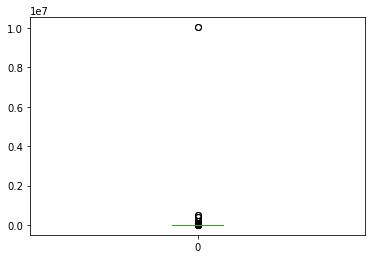

In [41]:
# distribution of max coefficient before pruning
max_coeff.plot(kind = 'box')

In [42]:
# identify formulas with coefficients larger than 100 as errors
# modify the threhold at your will
threshold = 100 

In [43]:
index_to_remove = formulas_df[max_coeff > threshold][1].values.tolist()
index_to_remove = list(set(index_to_remove))
print('remove',len(index_to_remove), 'datapoints')

remove 986 datapoints


In [44]:
# prune and save
batteries.drop(index=index_to_remove, inplace=True)
batteries.to_csv('batteries_further_cleaned.csv', index = False)

<AxesSubplot:>

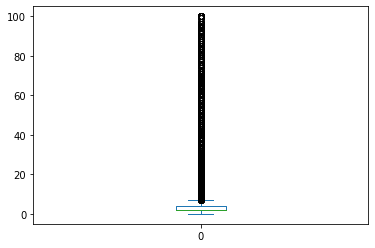

In [45]:
# distribution of max coefficient after pruning
formulas = batteries.Formulas.apply(ast.literal_eval)
formulas = formulas.apply(lambda x:[x] if type(x)==str else x)
formulas_df =  pd.DataFrame([(f,i)  for i,fs in formulas.to_dict().items() for f in fs])
max_coeff = formulas_df[0].apply(lambda x: max(parse_formula(x).values()))
max_coeff.plot(kind = 'box')


---
**Optional: dropping incorrectly represented formulas**
 
---

To our knowledge, There has not been a reliable method to automatically identify "unlikely" formulas like acronyms and misrepresented formulas. Hence, we adopted a two-step semi-manual error-detection strategy to identify the misrepresented formulas:

1. step one: Find unique instances (based on formulas, name source,and DOI) with potentially misrepresented formulas. 
2. step two: Idetify problematic formulas manually by marking a csv file of the potentially misrepresented instances:
  - instances with correct formulas are unmarked
  - instances that contain acronyms are marked **1**
  - instances that contain other misrepresented formulas are marked **2**
3. step three: For all instances marked problematic, remove them and any equivalent instances (again, based on formulas, name source,and DOI).

The csv file is provided as misrepresented.csv


In [46]:
# read further cleaned dataset, get formulas
batteries = pd.read_csv('batteries_further_cleaned.csv',index_col=0)
formulas = batteries.Formulas.apply(ast.literal_eval) 
formulas = formulas.apply(lambda x:[x] if type(x)==str else x)


In [47]:
# formulas that might be misrepresented / acronyms

# A formula is suspicious when 
# the avergae count for each element is below 1.5 
# & the max count of elements is below 3 
# &the number of elements below 6
def is_sus(formula):
    elem_dict = parse_formula(formula)
    c1 = sum(elem_dict.values()) / len(elem_dict) < 1.5
    c2 = max(elem_dict.values()) <= 3
    c3 = len(elem_dict) < 6
    return c1 & c2 & c3

sus_ones = formulas.apply(lambda x: any([is_sus(f) for f in x]))
sus_ones.value_counts()

False    183714
True      81767
Name: Formulas, dtype: int64

In [48]:
# take unique instances, and that reduces the number of 
# suspicious instances from 81767 to 29718

sorted_batteries = batteries[sus_ones].sort_values(by=['Formulas','Name_source']).reset_index()
sorted_batteries.index = sorted_batteries.iloc[:,0]
uniques = sorted_batteries[['Unnamed: 0','Formulas','Name_source','DOI']].drop_duplicates(subset=['Formulas','Name_source','DOI'])
# uniques.to_csv('misrepresented.csv', index=False)
print('unique instances',len(uniques))

unique instances 29718



**After the manual marking:**


In [49]:
# get indicies of the problematic instances
# read file
marked = pd.read_csv('misrepresented.csv')
bad_indicies_spotted = uniques[marked.Bad.values >0].iloc[:,0].values
# get all equivalent ones
bad_indicies = []
for bad_i in bad_indicies_spotted:
    compare = (sorted_batteries.loc[bad_i,['Formulas','Name_source','DOI']] == sorted_batteries.loc[:,['Formulas','Name_source','DOI']]).all(axis=1)
    bad_indicies.extend(compare.index[compare])
print('number of problematic instances',len(bad_indicies))

number of problematic instances 10725


In [50]:
# drop instances
batteries_new = batteries.drop(index=bad_indicies)
batteries.index.name = 'Index'
# also drop instances with a dash '-' as a formula
formulas = batteries_new.Formulas.apply(ast.literal_eval) 
has_dash = formulas.apply(lambda x :any(['-'in f for f in x]))
batteries_new.drop(index=batteries_new[has_dash].index, inplace=True)
# save 
batteries_new.to_csv('batteries_ultra_cleaned.csv')